In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

palette = ['#c4bae2','#40ada6','#3c4ebf',  
           '#edb1a3', '#d6543a',
           '#e3a600']

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams["figure.dpi"] = 300

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
neutros = pd.read_csv("H_neutros_pSIMI.csv", index_col=0)
cxf = pd.read_csv("LARRY_basic_vis.csv", index_col=0)
early = pd.read_csv("H_pMI_vis.csv", index_col=0)

def letter_annotation(ax, xoffset, yoffset, letter):
     ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
             size=14, weight='bold')
        
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False

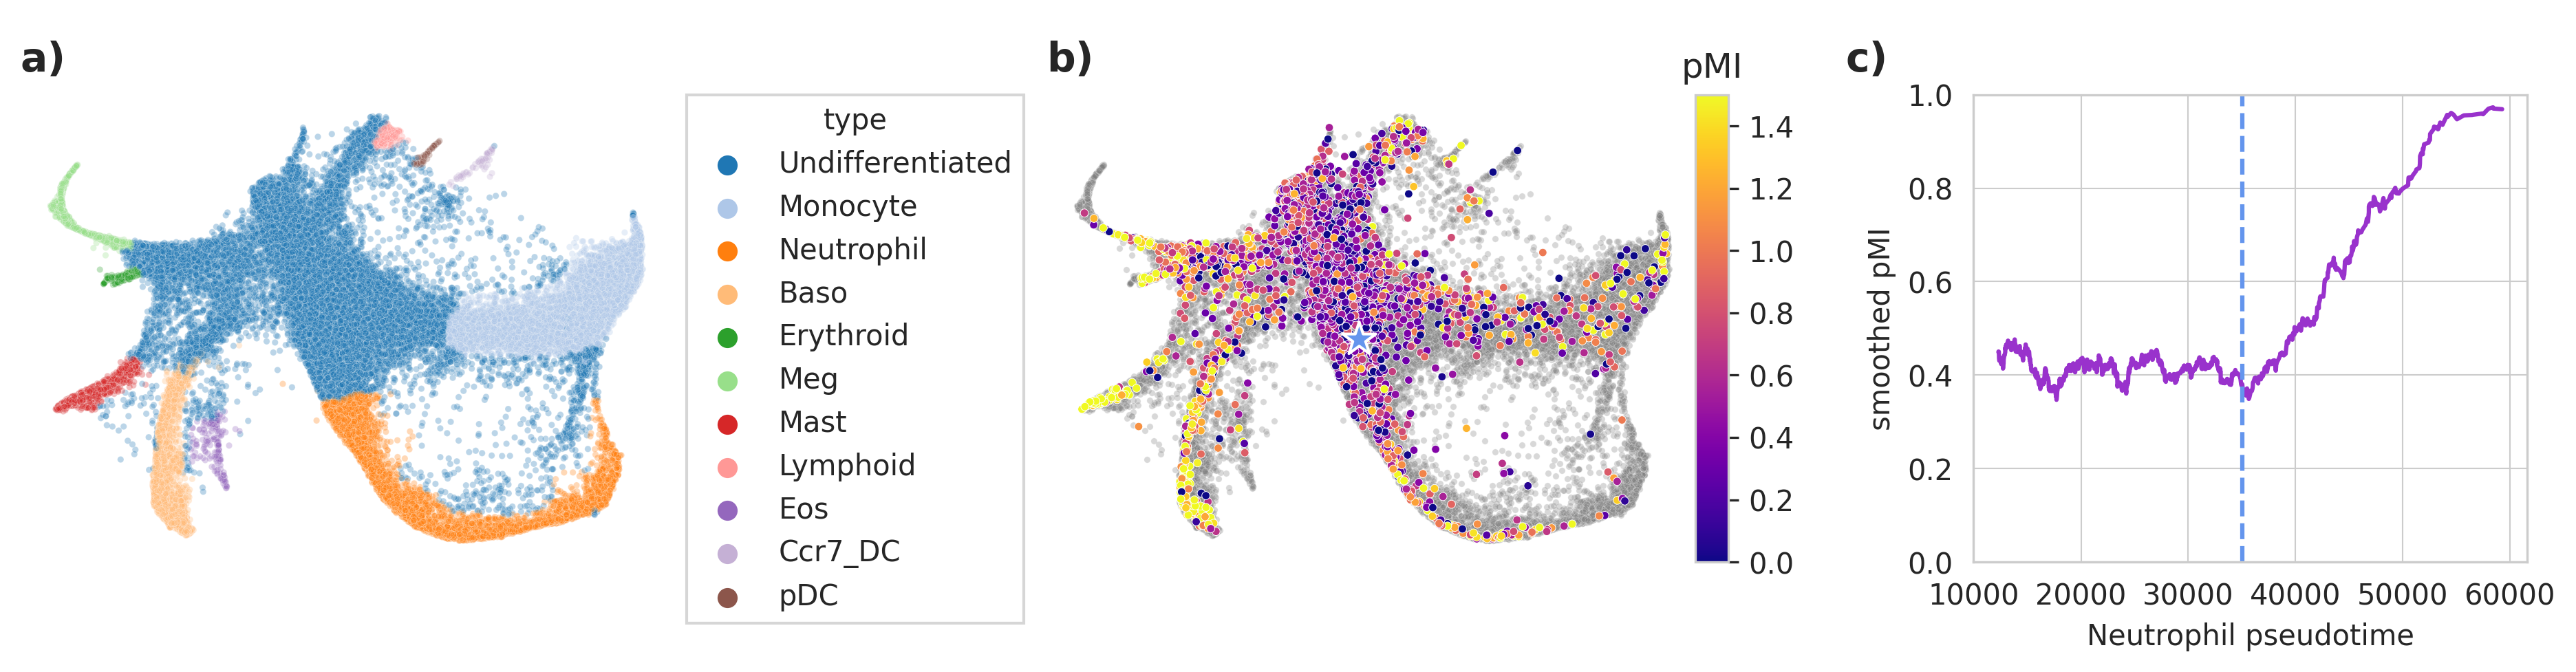

In [15]:
fig = plt.figure(figsize=(13, 3), dpi=300)

cts, legend, blank1, psimis, cbar, blank2, traj = fig.subfigures(1, 7, wspace=-0.2,
                                  width_ratios= (1, 0.3, .25, 1, 0.05, 0.4, 0.85))

ax_cts = cts.subplots()
ax_ps = psimis.subplots()
# ax_dpt = dpt.subplots()
ax_t = traj.subplots()

ax_cbar = cbar.subplots()
###################
#### Cell type ####
###################


sns.scatterplot(cxf,
                x='SPRING1', y="SPRING2", hue='type', 
                     s=5, alpha=0.3, palette='tab20', ax=ax_cts)
sns.move_legend(ax_cts, "upper left", bbox_to_anchor=(1, 1.03))
ax_cts.axis('off')

###################
#### pSIMI     ####
###################

star_color='cornflowerblue'
sns.scatterplot(cxf,
                x='SPRING1', y="SPRING2", c='gray', s=5, alpha=0.3, ax=ax_ps)
sns.scatterplot(early, legend=False, 
               x='SPRING1', y='SPRING2', hue='pMI', s=8, palette='plasma',
               hue_norm=(0,1.5), ax=ax_ps)
sns.scatterplot(neutros[neutros["Neutrophil PT"].isin(list(range(35050, 35070)))],
               x='SPRING1', y='SPRING2', c=star_color, s=150, marker="*",
               legend=False, ax=ax_ps)

norm = plt.Normalize(0, 1.5)
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
ax_ps.figure.colorbar(sm, cax=ax_cbar)
ax_cbar.set_title('pMI')
ax_ps.axis('off')


####################
#### trajectory ####
####################
sns.set_style('whitegrid')
# sns.scatterplot(neutros[neutros["Neutrophil PT"].isin(list(range(39000, 39050)) + 
#                                                      list(range(55000, 55500)))],
#                x='Neutrophil PT', y='smooth pSIMI', c='cyan', s=150, marker="*",
#                legend=False, ax=ax_t)
sns.lineplot(neutros, x="Neutrophil PT", y='smooth pMI', ax=ax_t,
            color='darkorchid')
ax_t.set_ylabel('smoothed pMI')
ax_t.set_xlabel('Neutrophil pseudotime')

ax_t.vlines(35050, 0, 1.25, color=star_color, linestyle='dashed')

ax_t.set_ylim(0, 1)


####################
#### letters    ####
####################

letter_annotation(ax_t, -0.23, 1.05, 'c)')
letter_annotation(ax_ps, 0, 1.05, 'b)')
letter_annotation(ax_cts, 0, 1.05, 'a)')

plt.show()